In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
def plot_compare(*args):
    L = len(args)

    if (L == 0):
        return None
    elif (L == 1):
        f = plt.figure(figsize=(15,15))
        plt.imshow(args[0])
        plt.axis('off')
    else:
        f, axs = plt.subplots(1, L, figsize=(15,15*L))
        for i, ax in enumerate(axs):
            ax.imshow(args[i])
            ax.axis('off')
    plt.show()
    return f 

### Item 1 

Na documentação da OpenCV é possével encontrar diversos detectores e descritores. Usando um conjunto com pelo menos 6 imagens (você pode tirar fotos com seu telefone, por exemplo), experimente três detectores distintos nestas imagens, incluindo o detector de Harris. Pesquise e descreva resumidamente com suas palavras (até 200 palavras para cada) como cada um funciona, incluindo seus parâmetros e quais as suas principais diferenças. Exiba resultados nas suas imagens, e em quais situações cada um funciona bem ou mal. Discuta seus parâmetros. Qual deles você achou melhor?

#### Minha análise

Eu preferi o detector FAST, já que ele trouxe muito mais matches e tem excelente performance. Utilizei os parâmetros padrão para todos os detectores. O MSER é interessantes, mas se aplica melhor pra detectar objetos, enquanto o Harris é muito custoso computacionalmente e ainda tem mais downsides que o FAST, então, não vejo muito sentido em utiliza-lo.

#### Imagens de Exemplo

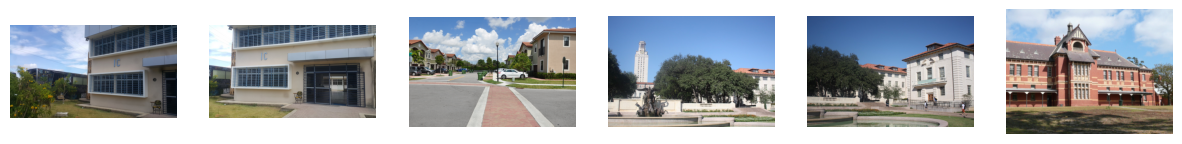

In [3]:
images = [cv2.cvtColor(cv2.imread(f'images/{i}.jpg'), cv2.COLOR_BGR2RGB) for i in range(1,6+1)]

original = plot_compare(*images)
original.savefig("./results/original.jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)

### Harris

O algoritmo de detecção de cantos HARRIS foi baseado no trabalho de Chris Harris e Mike Stephens em 1988. O algoritmo calcula a matriz de autocorrelação, que representa a distribuição de intensidade em torno de cada pixel. Em seguida, ele avalia a "resposta de cantos de Harris", examinando o determinante e a trilha da matriz. Essa resposta é uma medida de quão provável é que um pixel seja um canto. Por fim, aplica um limiar à resposta do canto para produzir uma imagem binária, com pixels brancos representando cantos.

Os principais parâmetros do HARRIS são:

- Tamanho do bloco: O tamanho da vizinhança usada para calcular a matriz. Um tamanho de bloco maior resulta em menos cantos detectados, enquanto um tamanho de bloco menor resulta em mais cantos detectados.

- K: Um fator de escala que determina a sensibilidade do algoritmo aos cantos. Um valor mais alto de K resulta em menos cantos detectados, enquanto um valor mais baixo de K resulta em mais cantos detectados.

- Threshold: O valor mínimo de resposta de canto para um pixel ser considerado um canto. Pixels com um valor de resposta de canto abaixo do desse valor não são considerados cantos.

O algoritmo de detecção de cantos HARRIS possui várias qualidades, ele é robusto a ruído de imagem e mudanças na iluminação, consegue detectar cantos em várias orientações e também pode detectar múltiplos cantos em uma pequena região. No entanto, possui algumas limitações, como, detectar falsos cantos em áreas com alta textura ou variações de intensidade ou falhar em detectar cantos em imagens com baixo contraste ou condições de iluminação ruim, também é mais lento do que outros algoritmos, devido ao cálculo da matriz para cada pixel.

In [4]:
def draw_harris(image):
    result = image.copy()
    
    gray = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    dst = cv2.dilate(dst, None)
    result[dst > 0.01 * dst.max()] = [255, 0, 0]
    return result

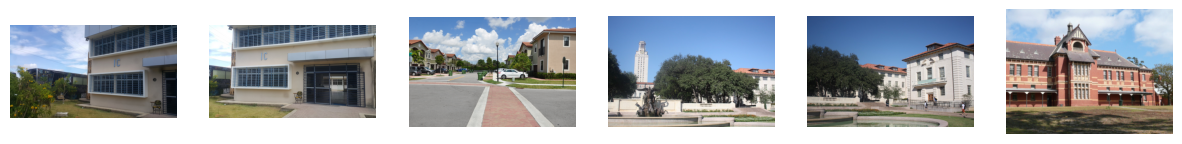

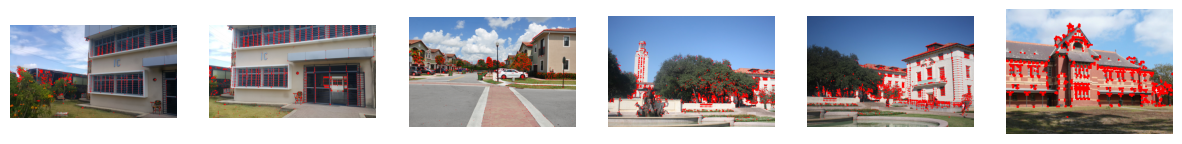

In [5]:
harris_images = [draw_harris(image) for image in images]

plot_compare(*images)

harris = plot_compare(*harris_images)
harris.savefig("./results/harris.jpg", dpi=400, bbox_inches='tight', pad_inches=0.1)

### Fast

O algoritmo de detecção de cantos FAST (Features from Accelerated Segment Test) da OpenCV é um método de detecção de recursos amplamente utilizado na visão computacional. Foi proposto por Edward Rosten e Tom Drummond em 2006, com o objetivo de fornecer um algoritmo rápido e eficiente para aplicativos em tempo real.

O algoritmo selecione um pixel e define um círculo de 16 pixels em torno dele, então identifica os três pixels mais brilhantes e os três mais escuros dentro do círculo, excluindo o pixel central. Então, verifica se o pixel central é mais brilhante do que os três mais brilhantes ou mais escuro do que os três mais escuros, se sim, o pixel central é considerado um canto potencial. Pra confirmar que um pixel central é um canto, o algoritmo aplica um conjunto de regras aos "candidatos" selecionados, se o candidato satisfaz as condições especificadas, é considerado um canto. 

Os principais parâmetros do FAST são:

- Threshold: A diferença mínima de intensidade entre o pixel central e os pixels no círculo para um pixel ser considerado um canto.

- Supressão não máxima: Uma técnica usada para eliminar cantos redundantes que estão muito próximos um do outro.

- Distância mínima: A distância mínima entre dois cantos para serem considerados distintos.

O algoritmo FAST é extremamente rápido e eficiente, o que o torna adequado para aplicativos em tempo real. Como o HARRIS, consegue detectar cantos em várias orientações e múltiplos cantos em uma pequena região, também é capaz de detectar cantos em imagens com contraste baixo
No entanto, o algoritmo também apresenta algumas limitações:

Pode detectar falsos cantos em regiões com alta textura ou variações de intensidade.
Pode falhar em detectar cantos em imagens com baixo contraste ou condições de iluminação ruins.
Pode ignorar cantos em regiões com baixa curvatura local.
Comparado a outros algoritmos de detecção de cantos, como o detector de cantos HARRIS ou o detector de cantos Shi-Tomasi, o detector de cantos FAST é conhecido por sua velocidade e eficiência. No entanto, ele pode ser menos robusto a ruído e mudanças de iluminação do que outros algoritmos e pode não se sair tão bem na detecção de cantos em imagens de baixa qualidade. Além disso, o detector de cantos FAST pode ignorar cantos em regiões com baixa curvatura local.

In [6]:
fast_detector = cv2.FastFeatureDetector_create()

def draw_fast(image):
    result = image.copy()
    gray = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)

    keypoints = fast_detector.detect(gray,None)
    result = cv2.drawKeypoints(result, keypoints, None, color=(255,0,0))

    return result

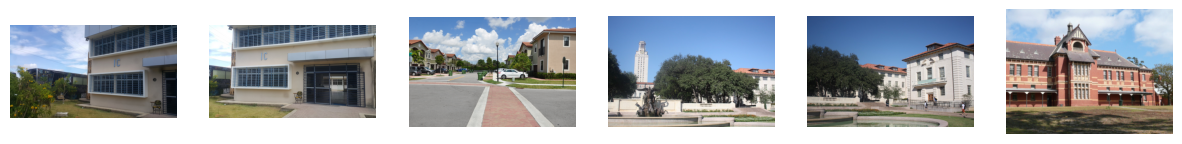

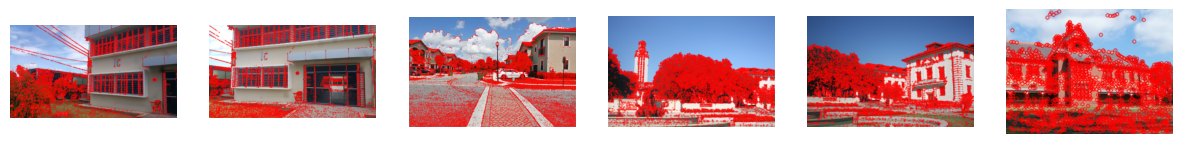

In [7]:
fast_images = [draw_fast(image) for image in images]

plot_compare(*images)

fast = plot_compare(*fast_images)
fast.savefig("./results/fast.jpg", dpi=400, bbox_inches='tight', pad_inches=0.1)

### MSER

O algoritmo MSER (Maximally Stable Extremal Regions) é um método para detectar características em imagens, identificando áreas com mudanças de intensidade significativas. Introduzido por Matas, J. et al. em 2002, ele é utilizado em uma variedade de aplicações, incluindo reconhecimento de objetos, correspondência de imagens e reconstrução 3D.

Inicialmente, é feita uma análise das variações de intensidade na imagem, calculando a diferença entre pixels adjacentes. Em seguida, são identificados componentes conectados na imagem que demonstram uma consistente mudança de intensidade, denominados regiões extremas. Cada região extrema é então avaliada em relação à sua estabilidade, comparando sua área com as áreas das regiões vizinhas. Uma região é considerada estável se sua área não sofrer mudanças significativas em comparação com as de seus vizinhos. As regiões extremas maximamente estáveis (MSERs) são selecionadas como o conjunto final de características detectadas.

Os principais parâmetros do algoritmo MSER são o Delta, que representa a variação mínima de intensidade necessária para que um pixel seja considerado parte de uma região, a Área mínima, que é o tamanho mínimo que uma região extremamente estável deve ter para ser considerada uma característica, e a Área máxima, que é o tamanho máximo que uma região extremamente estável pode alcançar para ser considerada uma característica.

O algoritmo MSER é reconhecido por suas diversas qualidades, incluindo sua resistência às mudanças de escala, iluminação e perspectiva, sua capacidade de detectar características em várias orientações e sua eficácia em imagens com baixo contraste ou em condições de iluminação desfavoráveis, no entanto, também apresenta algumas limitações, por exemplo, pode identificar erroneamente características em áreas com alta textura ou variações de intensidade e pode negligenciar características em regiões com baixo contraste local; além disso, possui um custo computacional mais elevado em comparação com outros algoritmos, o que pode limitar sua aplicação em tempo real.

In [8]:
mser_detector = cv2.MSER_create()

def draw_mser(image):
    result = image.copy()
    gray = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)

    keypoints = mser_detector.detect(gray)
    result = cv2.drawKeypoints(result, keypoints, None, color=(255,0,0))

    return result

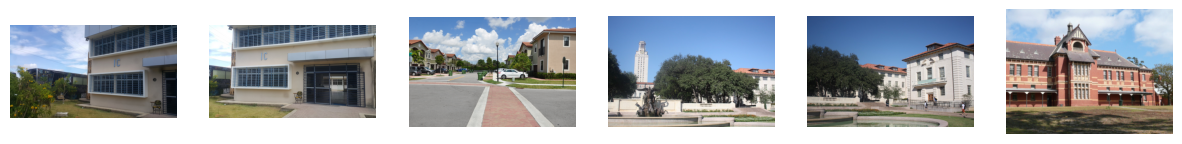

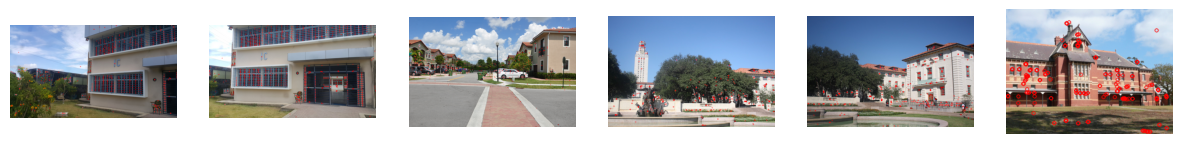

In [9]:
mser_images = [draw_mser(image) for image in images]

plot_compare(*images)

mser = plot_compare(*mser_images)
mser.savefig("./results/mser.jpg", dpi=400, bbox_inches='tight', pad_inches=0.1)